# A*搜索算法
- 盲目搜索
    - 宽度优先搜索算法、深度优先搜索算法
- 启发式搜索
    - 基本思想：定义一个评价函数f，对当前的搜索状态进行评估，找出一个最有希望的节点来扩展。

## A*算法流程图

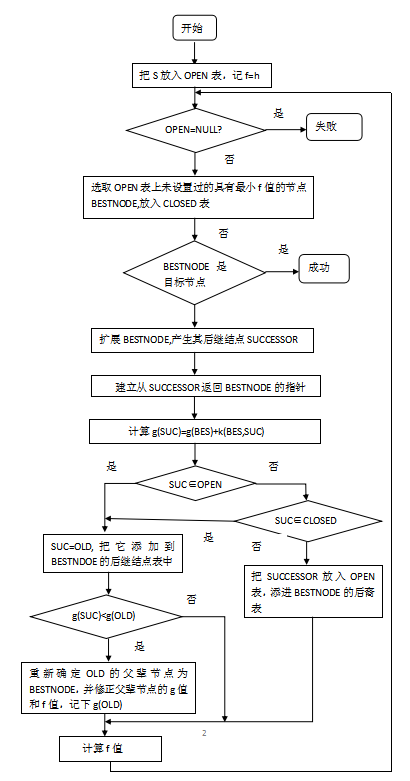

In [9]:
from IPython.display import Image
Image(filename='AStarProcess.png', width=500)

## A*算法总结

1. 把起始状态添加到开启列表
2. 重复如下工作：    
    (1) 寻找开启列表中f值最低的节点，我们称它为BESTNOE    
    (2) 把它切换到关闭列表中    
    (3) 对相邻的4个节点中的每一个
        a.如果它不在开启列表，也不在关闭列表，把它添加到开启列表中。把BESTNODE作为这一节点的父节点。记录这一节点的f和g值
        b.如果它已在开启或关闭列表中，用g值为参考检查新的路径是否更好。更低的g值意味着更好的路径。如果这样，就把这一节点的父节点改为BESTNODE，并且重新计算这一节点的f和g值，如果保持开启列表的f值排序，改变之后需要重新对开启列表排序    
    (4) 停止
        把目标节点添加到关闭列表，这时候路径被找到，或者没有找到路径，开启列表已经空了，这时候路径不存在。
3. 保存路径。从目标节点开始，沿着每一节点的父节点移动直到回到起始节点。这就是求得的路径。

In [8]:
import math

#地图
tm = [
'############################################################',
'#..........................................................#',
'#.............................#............................#',
'#.............................#............................#',
'#.............................#............................#',
'#.......S.....................#............................#',
'#.............................#............................#',
'#.............................#............................#',
'#.............................#............................#',
'#.............................#............................#',
'#.............................#............................#',
'#.............................#............................#',
'#.............................#............................#',
'#######.#######################################............#',
'#....#........#............................................#',
'#....#........#............................................#',
'#....##########............................................#',
'#..........................................................#',
'#..........................................................#',
'#..........................................................#',
'#..........................................................#',
'#..........................................................#',
'#...............................##############.............#',
'#...............................#........E...#.............#',
'#...............................#............#.............#',
'#...............................#............#.............#',
'#...............................#............#.............#',
'#...............................###########..#.............#',
'#..........................................................#',
'#..........................................................#',
'############################################################']

#因为python里string不能直接改变某一元素，所以用test_map来存储搜索时的地图
test_map = []

#########################################################
class Node_Elem:
        """
    开放列表和关闭列表的元素类型，parent用来在成功的时候回溯路径
    """
        def __init__(self,parent,x,y,dist):
            self.parent = parent
            self.x =x
            self.y = y
            self.dist = dist
            
class A_Star:
    """
    A星算法实现类
  """
    # 注意w,h两个参数，如果你修改了地图，需要传入一个正确值或者修改这里的默认参数
    def __init__ (self, s_x, s_y, e_x, e_y, w=60, h=30):
        self.s_x = s_x
        self.s_y = s_y
        self.e_x = e_x
        self.e_y = e_y
        self.width = w
        self.height = h
        
        self.open = []
        self.close = []
        self.path = []
    
    # 查找路径的入口函数
    def find_path(self):
        # 构建开始节点 
        p = Node_Elem(None, self.s_x, self.s_y, 0.0)
        while True:
            #扩展F值最小的节点
            self.extend_round(p)
            #如果开放列表为空，则不存在路径，返回
            if not self.open:
                return
            #获取F值最小的节点
            idx, p = self.get_best()
            #找到路径，生成路径，返回
            if self.is_target(p):
                self.make_path(p)
                return
            #把此节点压入关闭列表，并从开放列表里删除
            self.close.append(p)
            del self.open[idx]
        
    def make_path(self,p):
        #从结束点回溯到开始点，开始点的parent == None
        while p:
            self.path.append((p.x, p.y))
            p = p.parent
                
    def is_target(self, i):
        return i.x == self.e_x and i.y == self.e_y
        
    def get_best(self):
        best = None
        bv = 1000000    #如果你修改的地图很大，可能需要修改这个值
        bi = -1
        for idx, i in enumerate(self.open):
            value = self.get_dist(i)#获取F值
            if value < bv:#比以前的更好，即F值更小
                best = i
                bv = value
                bi = idx
        return bi, best
        
    def get_dist(self, i):
        # F = G + H
        # G 为已经走过的路径长度， H为估计还要走多远
        # 这个公式就是A*算法的精华了。
        return i.dist + math.sqrt(
                (self.e_x-i.x)*(self.e_x-i.x)
                 + (self.e_y-i.y)*(self.e_y-i.y))*1.2
        
    def extend_round(self, p):
        #可以从8个方向走
        xs = (-1, 0, 1, -1, 1, -1, 0, 1)
        ys = (-1,-1,-1, 0, 0, 1, 1, 1)
        #只能走上下左右四个方向
        # xs = (0, -1, 1, 0)
        # ys = (-1, 0, 0, 1)
        for x, y in zip(xs, ys):
            new_x, new_y = x + p.x, y + p.y
            #无效或者不可行走区域，则勿略
            if not self.is_valid_coord(new_x, new_y):
                continue
            #构造新的节点
            node = Node_Elem(p, new_x, new_y, p.dist+self.get_cost(p.x, p.y, new_x, new_y))
            #新节点在关闭列表，则忽略
            if self.node_in_close(node):
                continue
            i = self.node_in_open(node)
            if i != -1:
                #新节点在开放列表
                if self.open[i].dist > node.dist:
                    #现在的路径到比以前到这个节点的路径更好~
                    #则使用现在的路径
                    self.open[i].parent = p
                    self.open[i].dist = node.dist
                continue
            self.open.append(node)
        
    def get_cost(self, x1, y1, x2, y2):
        """
        上下左右直走，代价为1.0，斜走，代价为1.4
        """
        if x1 == x2 or y1 == y2:
            return 1.0
        return 1.4
        
    def node_in_close(self, node):
        for i in self.close:
            if node.x == i.x and node.y == i.y:
                return True
        return False
            
    def node_in_open(self, node):
        for i, n in enumerate(self.open):
            if node.x == n.x and node.y == n.y:
                return i
        return -1
        
    def is_valid_coord(self, x, y):
        if x < 0 or x >= self.width or y < 0 or y >= self.height:
            return False
        return test_map[y][x] != '#'
        
    def get_searched(self):
        l = []
        for i in self.open:
            l.append((i.x, i.y))
        for i in self.close:
            l.append((i.x, i.y))
        return l
            
#########################################################
def print_test_map():
    """
    打印搜索后的地图
    """
    for line in test_map:
        print(''.join(line))
        
def get_start_XY():
    return get_symbol_XY('S')

def get_end_XY():
    return get_symbol_XY('E')

def get_symbol_XY(s):
    for y, line in enumerate(test_map):
        try:
            x = line.index(s)
        except:
                continue
        else:
                break
    return x, y

#########################################################
def mark_path(l):
    mark_symbol(l, '*')
    
def mark_searched(l):
    mark_symbol(l, '.')
    
def mark_symbol(l, s):
    for x, y in l:
        test_map[y][x] = s
        
def mark_start_end(s_x, s_y, e_x, e_y):
    test_map[s_y][s_x] = 'S'
    test_map[e_y][e_x] = 'E'
    
def tm_to_test_map():
    for line in tm:
        test_map.append(list(line))
        
def find_path():
    s_x, s_y = get_start_XY()
    e_x, e_y = get_end_XY()
    a_star = A_Star(s_x, s_y, e_x, e_y)
    a_star.find_path()
    searched = a_star.get_searched()
    path = a_star.path
    #标记已搜索区域
    mark_searched(searched)
    #标记路径
    mark_path(path)
    print("path length is %d"%(len(path)))
    print("searched squares count is %d"%(len(searched)))
    #标记开始、结束点
    mark_start_end(s_x, s_y, e_x, e_y)
    
if __name__ == "__main__":
    #把字符串转成列表
    tm_to_test_map()
    print_test_map()
    find_path()
    print_test_map()


############################################################
#..........................................................#
#.............................#............................#
#.............................#............................#
#.............................#............................#
#.......S.....................#............................#
#.............................#............................#
#.............................#............................#
#.............................#............................#
#.............................#............................#
#.............................#............................#
#.............................#............................#
#.............................#............................#
#######.#######################################............#
#....#........#............................................#
#....#........#............................................#
#....##########.........